In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
dt = DecisionTreeClassifier(random_state=156)
data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=11)
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=156, splitter='best')

In [3]:
from sklearn.tree import export_graphviz

export_graphviz(dt, out_file='tree.dot', class_names=data.target_names,
               feature_names=data.feature_names, impurity=True, filled=True)

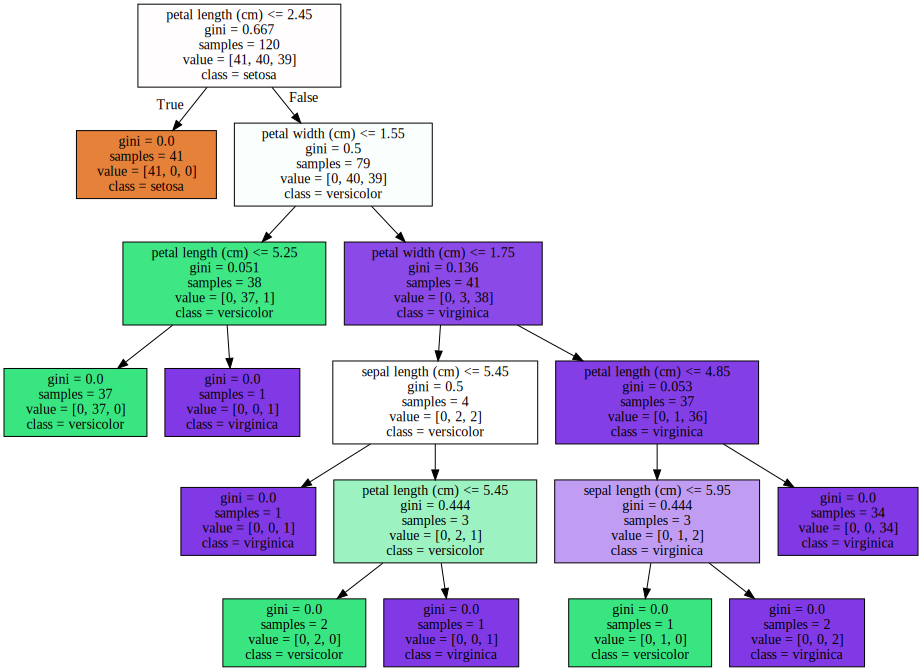

In [4]:
import graphviz
with open('tree.dot') as f:
    dot_graph = f.read()
    
graphviz.Source(dot_graph)

In [5]:
import seaborn as sns
import numpy as np
%matplotlib inline

In [6]:
np.round(dt.feature_importances_, 3)

array([0.025, 0.   , 0.555, 0.42 ])

In [7]:
for name, value in zip(data.feature_names, dt.feature_importances_):
    print(name, value)

sepal length (cm) 0.02500520941862888
sepal width (cm) 0.0
petal length (cm) 0.5549028149313102
petal width (cm) 0.42009197565006084


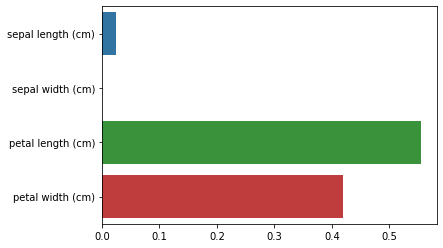

In [8]:
sns.barplot(x=dt.feature_importances_, y=data.feature_names)

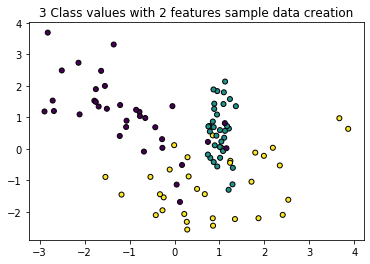

In [9]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title('3 Class values with 2 features sample data creation')

X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                                          n_classes=3, n_clusters_per_class=1, random_state=0)

plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, s=25, edgecolors='k')

In [10]:
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    # 학습 데이타 scatter plot으로 나타내기\n,
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, 
               cmap='rainbow', edgecolor='k',clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()

    # 호출 파라미터로 들어온 training 데이타로 model 학습 .
    model.fit(X, y)
           
    # meshgrid 형태인 모든 좌표값으로 예측 수행.
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # contourf() 를 이용하여 class boundary 를 visualization 수행.
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()), zorder=1)

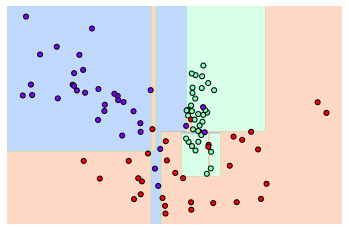

In [11]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt, X_features, y_labels)

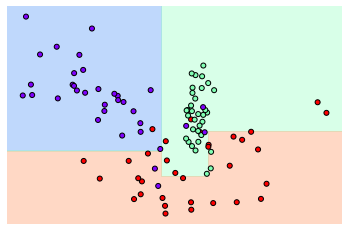

In [12]:
dt = DecisionTreeClassifier(min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt, X_features, y_labels)

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
import os

HOME = os.path.expanduser('~')

In [15]:
feature = pd.read_csv(HOME + '/temp/human_activity/features.txt', sep='\s+',
                     header=None, names=['column_index', 'column_name'])

In [16]:
feature_name = feature.iloc[:, 1].values.tolist()
feature_name[:10]

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X']

In [17]:
feature_due = feature.groupby('column_name').count()
feature_due[feature_due['column_index'] > 1].count()

column_index    42
dtype: int64

In [18]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name',
                                                             'dup_cnt']].apply(lambda x: x[0] + '_' + str(x[1])
                                                                              if x[1] > 0 else x[0], axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [19]:
def get_human_dataset():
    name = pd.read_csv(HOME+'/temp/human_activity/features.txt', sep='\s+',
                      header=None, names=['column_index', 'column_name'])
    
    new = get_new_feature_name_df(name)
    
    feature = new.iloc[:, 1].values.tolist()
    
    X_train = pd.read_csv(HOME+'/temp/human_activity/train/X_train.txt', sep='\s+',
                         names=feature)
    X_test = pd.read_csv(HOME+'/temp/human_activity/test/X_test.txt', sep='\s+',
                         names=feature)
    y_train = pd.read_csv(HOME+'/temp/human_activity/train/y_train.txt', sep='\s+',
                         names=['action'], header=None)
    y_test = pd.read_csv(HOME+'/temp/human_activity/test/y_test.txt', sep='\s+',
                         names=['action'], header=None)
    
    return X_train, X_test, y_train, y_test

In [20]:
X_train, X_test, y_train, y_test = get_human_dataset()

In [21]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB


In [22]:
y_train['action'].value_counts()

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier(random_state=156)
dt.fit(X_train, y_train)
pred = dt.predict(X_test)
accuracy_score(y_test, pred)

0.8547675602307431

In [24]:
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 156,
 'splitter': 'best'}

In [25]:
from sklearn.model_selection import GridSearchCV

In [26]:
list(range(6, 24, 2))

[6, 8, 10, 12, 14, 16, 18, 20, 22]

In [27]:
params = {'max_depth': list(range(6, 26, 2))}

In [28]:
grid_cv = GridSearchCV(dt, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)

grid_cv.best_score_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.1min finished


0.8513444970102249

In [29]:
grid_cv.best_params_

{'max_depth': 16}

In [30]:
cv_result = pd.DataFrame(grid_cv.cv_results_)
cv_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.483582,0.042249,0.003343,0.000077,6,{'max_depth': 6},0.813732,0.872876,0.819728,0.865986,0.881633,0.850791,0.028313,6
1,1.849752,0.031601,0.003371,0.000066,8,{'max_depth': 8},0.820530,0.819850,0.855102,0.868707,0.891156,0.851069,0.027719,4
2,2.181478,0.060182,0.003204,0.000035,10,{'max_depth': 10},0.799456,0.814412,0.863265,0.891156,0.887755,0.851209,0.037707,2
3,2.467773,0.119642,0.003204,0.000039,12,{'max_depth': 12},0.794697,0.813052,0.848980,0.877551,0.886395,0.844135,0.035598,10
4,2.650477,0.166941,0.003234,0.000070,14,{'max_depth': 14},0.794018,0.819171,0.853061,0.889116,0.883673,0.847808,0.036698,9
5,2.766898,0.207937,0.003210,0.000053,16,{'max_depth': 16},0.799456,0.818491,0.853061,0.887755,0.897959,0.851344,0.038140,1
6,2.791765,0.232615,0.003217,0.000045,18,{'max_depth': 18},0.804215,0.818491,0.856463,0.877551,0.898639,0.851072,0.035355,3
7,2.856014,0.241002,0.003247,0.000026,20,{'max_depth': 20},0.802855,0.818491,0.856463,0.877551,0.898639,0.850800,0.035718,5
8,2.868780,0.262873,0.003204,0.000021,22,{'max_depth': 22},0.796057,0.818491,0.856463,0.877551,0.898639,0.849440,0.037597,7
9,2.830554,0.265011,0.003248,0.000029,24,{'max_depth': 24},0.796057,0.818491,0.856463,0.877551,0.898639,0.849440,0.037597,7


In [31]:
for depth in list(range(6, 26, 2)):
    dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=156)
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print('max_depth = {0} 정확도: {1:.4f}'.format(depth, accuracy))

max_depth = 6 정확도: 0.8558
max_depth = 8 정확도: 0.8707
max_depth = 10 정확도: 0.8673
max_depth = 12 정확도: 0.8646
max_depth = 14 정확도: 0.8571
max_depth = 16 정확도: 0.8575
max_depth = 18 정확도: 0.8548
max_depth = 20 정확도: 0.8548
max_depth = 22 정확도: 0.8548
max_depth = 24 정확도: 0.8548


In [32]:
params = {
    'max_depth': [8 ,12, 16, 20],
    'min_samples_split': [16, 24]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
grid_cv.best_score_

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  1.7min finished


0.8548794147162603

In [33]:
grid_cv.best_params_

{'max_depth': 8, 'min_samples_split': 16}

In [35]:
best = grid_cv.best_estimator_
pred1 = best.predict(X_test)
accuracy = accuracy_score(y_test, pred1)
accuracy

0.8717339667458432

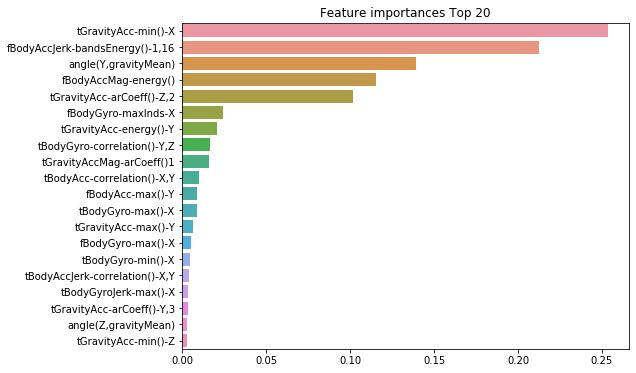

In [36]:
import seaborn as sns

ftr = best.feature_importances_
ftr_importances = pd.Series(ftr, index=X_train.columns)
ftr20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8, 6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr20, y=ftr20.index)
plt.show()